In [2]:
# Dependencies

import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import api_key
import csv
import json
import numpy as np
import datetime
from datetime import date


In [3]:
#Getting weather data for 2018, 2019, 2020
url = "http://api.worldweatheronline.com/premium/v1/past-weather.ashx"
request = url + "?" + "key=" + api_key +"&q=Minneapolis,MN" + "&date=2018-01-01" + "&enddate=2020-12-31" + "&tp=24" + "&format=json"
response = requests.get(request)
weather_data = response.json()

print(json.dumps(weather_data, indent=4, sort_keys=True))


{
    "data": {
        "request": [
            {
                "query": "Minneapolis, United States of America",
                "type": "City"
            }
        ],
        "weather": [
            {
                "astronomy": [
                    {
                        "moon_illumination": "97",
                        "moon_phase": "Waxing Gibbous",
                        "moonrise": "05:42 PM",
                        "moonset": "08:06 AM",
                        "sunrise": "08:51 AM",
                        "sunset": "05:43 PM"
                    }
                ],
                "avgtempC": "-22",
                "avgtempF": "-7",
                "date": "2018-01-01",
                "hourly": [
                    {
                        "DewPointC": "-23",
                        "DewPointF": "-10",
                        "FeelsLikeC": "-30",
                        "FeelsLikeF": "-22",
                        "HeatIndexC": "-22",
                        

In [6]:
weather_df = pd.read_csv('../Resources/weather_data_long.csv')
crime_df =pd.read_csv('../Resources/NEIGHBORHOOD_CRIME_STATS.csv')
weather_2017 = weather_df[(weather_df['date'] >= '2017-01-01')]
weather_2017.to_csv("../Resources/weather_2017.csv", encoding="utf-8", index=False)

In [7]:
weather_df['date'] = pd.to_datetime(weather_df['date'])
weathert7_t21 = weather_df[(weather_df['date'] >= '2017-08-31') & (weather_df['date'] <= '2021-03-31')]
new_weather

NameError: name 'new_weather' is not defined

In [8]:
weather_df.head()

,loc_id,date,maxtempC,maxtempF,mintempC,mintempF,avgtempC,avgtempF,totalprecipMM,totalprecipIn,...,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,1,2008-07-01,29,83,16,61,23,73,0.0,0.00,...,21,23,74,6,05:31 AM,09:03 PM,03:25 AM,08:17 PM,Waning Gibbous,89.7
1,1,2008-07-02,25,76,18,65,22,72,1.2,0.05,...,24,23,74,6,05:31 AM,09:03 PM,04:31 AM,09:15 PM,Waning Gibbous,82.8
2,1,2008-07-03,25,77,13,55,19,65,0.0,0.00,...,9,18,65,5,05:32 AM,09:03 PM,05:49 AM,09:58 PM,Waning Gibbous,75.9
3,1,2008-07-04,27,80,15,60,21,70,0.0,0.00,...,11,21,70,6,05:33 AM,09:03 PM,07:12 AM,10:30 PM,Last Quarter,69.0
4,1,2008-07-05,28,82,18,64,22,72,0.0,0.00,...,25,23,74,6,05:33 AM,09:02 PM,08:33 AM,10:56 PM,Last Quarter,62.1


In [9]:
weather_df.dtypes

loc_id                        int64
date                 datetime64[ns]
maxtempC                      int64
maxtempF                      int64
mintempC                      int64
mintempF                      int64
avgtempC                      int64
avgtempF                      int64
totalprecipMM               float64
totalprecipIn               float64
windspeedMiles                int64
windspeedKmph                 int64
sunhour                     float64
winddirdegree                 int64
winddir16point               object
weatherCode                   int64
weatherIconUrl               object
weatherDesc                  object
humidity                      int64
visibilityKm                  int64
visibilityMiles               int64
pressureMB                    int64
pressureInches                int64
cloudcover                    int64
HeatIndexC                    int64
HeatIndexF                    int64
DewPointC                     int64
DewPointF                   

In [10]:
# Simplify the weather dataframe
weather_data = weather_df[['date','weatherDesc', 'maxtempF', 'mintempF', 'avgtempF', 'totalprecipIn', 'windspeedMiles', 'humidity', 'FeelsLikeF','visibilityMiles']]
weather_data.head(50)

,date,weatherDesc,maxtempF,mintempF,avgtempF,totalprecipIn,windspeedMiles,humidity,FeelsLikeF,visibilityMiles
0,2008-07-01,Partly cloudy,83,61,73,0.00,8,62,74,6
1,2008-07-02,Sunny,76,65,72,0.05,10,62,74,6
2,2008-07-03,Sunny,77,55,65,0.00,4,67,65,6
3,2008-07-04,Sunny,80,60,70,0.00,4,66,70,6
4,2008-07-05,Sunny,82,64,72,0.00,10,65,74,6
5,2008-07-06,Sunny,91,66,78,0.17,6,71,82,6
6,2008-07-07,Sunny,80,67,74,0.25,5,81,77,5
7,2008-07-08,Sunny,78,67,72,0.01,9,67,73,4
8,2008-07-09,Sunny,82,59,71,0.00,5,60,71,6
9,2008-07-10,Sunny,87,65,75,0.05,8,62,78,6


In [11]:
weather_data.groupby(['weatherDesc', 'date']).sum()

maxtempF  mintempF  avgtempF  \
weatherDesc                 date                                       
Blizzard                    2009-01-23        20         0        12   
                            2009-02-18        32         9        22   
                            2009-12-09        17         3        10   
                            2010-12-11        19         6        15   
                            2011-02-20        26        20        23   
...                                          ...       ...       ...   
Thundery outbreaks possible 2019-06-14        78        59        67   
                            2020-08-08        82        74        78   
                            2020-08-09        86        76        81   
                            2020-08-13        80        66        73   
Torrential rain shower      2016-05-23        78        63        69   

                                        totalprecipIn  windspeedMiles  \
weatherDesc                 date                                        
Blizzard                    2009-01-23           0.01              15   
                            2009-02-18           0.11              13   
                            2009-12-09           0.27              18   
                            2010-12-11           1.00              16   
                            2011-02-20           0.61              12   
...                                               ...             ...   
Thundery outbreaks possible 2019-06-14           0.49              12   
                            2020-08-08           0.06               9   
                            2020-08-09           0.01               7   
                            2020-08-13           0.05              11   
Torrential rain shower      2016-05-23           0.80              13   

                                        humidity  FeelsLikeF  visibilityMiles  
weatherDesc                 date                                               
Blizzard                    2009-01-23        96          -4                4  
                            2009-02-18        90           9                1  
                            2009-12-09        96          -9                0  
                            2010-12-11        99          -2                0  
                            2011-02-20        98          12                1  
...                                          ...         ...              ...  
Thundery outbreaks possible 2019-06-14        72          67                5  
                            2020-08-08        80          82                5  
                            2020-08-09        79          88                5  
                            2020-08-13        79          76                5  
Torrential rain shower      2016-05-23        77          69                4  

[4687 rows x 8 columns]

In [12]:
Blizzard_df = weather_data.loc[(weather_data['weatherDesc'] == 'Blizzard') | (weather_data['weatherDesc'] == 'Blowing snow')]
Flood_df = weather_data[(weather_data['weatherDesc'] == 'Light rain')]
IceStorm_df = weather_data[(weather_data['weatherDesc'] == 'Heavy snow')]


In [13]:
Blizzard_Weather = Blizzard_df.groupby(['weatherDesc', 'date']).sum()
Flood_Weather = Flood_df.groupby(['weatherDesc', 'date']).sum()
IceStorm_Weather = IceStorm_df.groupby(['weatherDesc', 'date']).sum()


In [14]:
Blizzard_Weather

maxtempF  mintempF  avgtempF  totalprecipIn  \
weatherDesc  date                                                      
Blizzard     2009-01-23        20         0        12           0.01   
             2009-02-18        32         9        22           0.11   
             2009-12-09        17         3        10           0.27   
             2010-12-11        19         6        15           1.00   
             2011-02-20        26        20        23           0.61   
             2011-03-12        31        17        23           0.04   
             2011-04-04        42        32        36           0.06   
             2012-12-20        25        16        21           0.14   
             2013-02-11        26        19        24           0.08   
             2013-04-19        34        28        31           0.08   
             2014-01-16        31         4        18           0.03   
             2014-01-22         7        -7         0           0.02   
             2014-03-21        35        21        30           0.08   
             2015-02-01        19        10        14           0.13   
             2015-11-26        38        26        32           0.17   
             2016-02-02        31        22        27           0.37   
             2016-02-03        24        14        18           0.05   
             2017-02-24        29        23        27           0.13   
             2017-10-27        37        32        34           0.22   
             2018-01-22        32        26        30           0.87   
             2018-04-14        30        23        27           1.34   
             2018-12-02        33        27        31           0.06   
             2019-01-24        16        -6         5           0.02   
             2019-02-24        29        -2        14           0.15   
             2019-04-11        34        29        32           0.66   
             2019-11-27        31        23        27           0.43   
Blowing snow 2013-12-17        26        15        21           0.00   
             2015-02-11        28         7        18           0.02   
             2015-12-17        28        18        25           0.00   
             2016-01-15        24         7        18           0.04   
             2016-02-09        14         5         9           0.01   
             2016-03-23        37        32        34           0.20   
             2016-04-01        42        31        36           0.02   
             2016-04-08        34        21        30           0.02   
             2016-11-19        29        20        26           0.02   
             2016-12-07        21        15        18           0.00   
             2017-01-03        30         4        17           0.00   

                         windspeedMiles  humidity  FeelsLikeF  visibilityMiles  
weatherDesc  date                                                               
Blizzard     2009-01-23              15        96          -4                4  
             2009-02-18              13        90           9                1  
             2009-12-09              18        96          -9                0  
             2010-12-11              16        99          -2                0  
             2011-02-20              12        98          12                1  
             2011-03-12              13        98          10                2  
             2011-04-04              14        89          28                3  
             2012-12-20              13        90           8                2  
             2013-02-11              14        87          11                2  
             2013-04-19              13        92          20                3  
             2014-01-16              14        87           3                3  
             2014-01-22              12        90         -17                2  
             2014-03-21              10        94          20                4  
 

In [15]:
BlizzData = Blizzard_df.groupby(pd.Grouper(key="date", freq="1M")).sum()
BlizzData

,maxtempF,mintempF,avgtempF,totalprecipIn,windspeedMiles,humidity,FeelsLikeF,visibilityMiles
date,,,,,,,,
2009-01-31,20,0,12,0.01,15,96,-4,4
2009-02-28,32,9,22,0.11,13,90,9,1
2009-03-31,0,0,0,0.00,0,0,0,0
2009-04-30,0,0,0,0.00,0,0,0,0
2009-05-31,0,0,0,0.00,0,0,0,0
...,...,...,...,...,...,...,...,...
2019-07-31,0,0,0,0.00,0,0,0,0
2019-08-31,0,0,0,0.00,0,0,0,0
2019-09-30,0,0,0,0.00,0,0,0,0


No handles with labels found to put in legend.


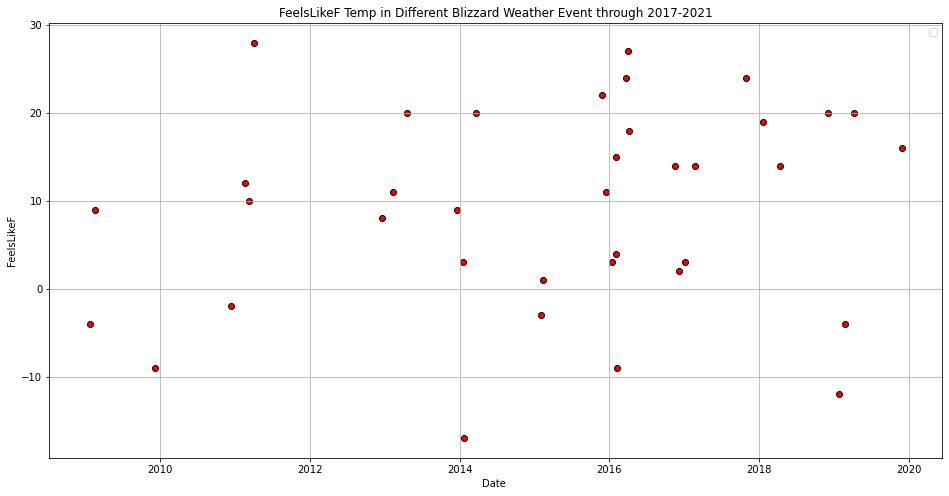

In [16]:
x_values = Blizzard_df['date']
y_values = Blizzard_df['FeelsLikeF']
# plt.scatter(x_values, BlizzData, marker="o", facecolors="red", edgecolors="black",
#             s=x_values, alpha=0.75, label='Temperature (F)')

plt.figure(figsize=(16, 8))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.grid()
plt.xlabel('Date ')
plt.ylabel('FeelsLikeF')
plt.title('FeelsLikeF Temp in Different Blizzard Weather Event through 2017-2021')
plt.legend()
plt.savefig('FeelsLikeFBlizzard Weather Event 2017-2021')
plt.show()

In [17]:
Flood_Weather

maxtempF  mintempF  avgtempF  totalprecipIn  \
weatherDesc date                                                      
Light rain  2009-04-19        51        39        44           0.20   
            2010-05-11        42        36        39           0.37   
            2011-04-26        48        37        43           1.14   
            2011-06-22        67        54        63           0.38   
            2012-03-22        65        56        60           0.57   
            2012-10-22        56        49        53           0.11   
            2013-03-30        39        36        38           0.18   
            2013-05-01        53        36        42           0.36   
            2014-03-11        35        27        33           0.25   
            2015-04-06        41        36        39           0.26   
            2015-05-14        55        50        53           0.35   
            2015-05-26        64        54        59           0.16   
            2015-06-11        64        57        60           0.32   
            2015-06-13        69        60        63           0.11   
            2015-09-24        66        63        64           0.45   
            2016-03-15        58        47        52           0.28   
            2016-09-07        75        62        69           0.21   
            2017-08-26        66        59        63           0.33   
            2017-09-18        60        58        58           0.32   
            2017-10-07        68        54        58           0.23   
            2019-05-08        52        40        44           0.91   
            2019-10-10        60        51        57           0.25   
            2019-10-21        56        47        51           0.69   
            2019-11-17        36        32        34           0.09   
            2020-04-24        43        29        40           0.15   
            2021-03-10        51        36        42           0.33   
            2021-04-12        50        39        45           0.27   
            2021-04-29        47        33        43           0.10   

                        windspeedMiles  humidity  FeelsLikeF  visibilityMiles  
weatherDesc date                                                               
Light rain  2009-04-19               7        80          39                5  
            2010-05-11               8        98          32                4  
            2011-04-26              12        97          36                4  
            2011-06-22               8        95          62                5  
            2012-03-22               7        95          59                4  
            2012-10-22               9        92          50                4  
            2013-03-30               8       100          31                4  
            2013-05-01               7        84          37                5  
            2014-03-11               9        98          25                4  
            2015-04-06              15        84          30                3  
            2015-05-14              14        83          48                5  
            2015-05-26               5        89          58                5  
            2015-06-11               9        81          60                5  
            2015-06-13               7        85          63                6  
            2015-09-24               6        92          64                4  
            2016-03-15              10        86          48                5  
            2016-09-07               5        90          69                5  
            2017-08-26              10        87          62                5  
            2017-09-18               7        71          58                5  
            2017-10-07               7        82          57                4  
            2019-05-08              14        77          37                5  
            2019-10-10              10        83     

No handles with labels found to put in legend.


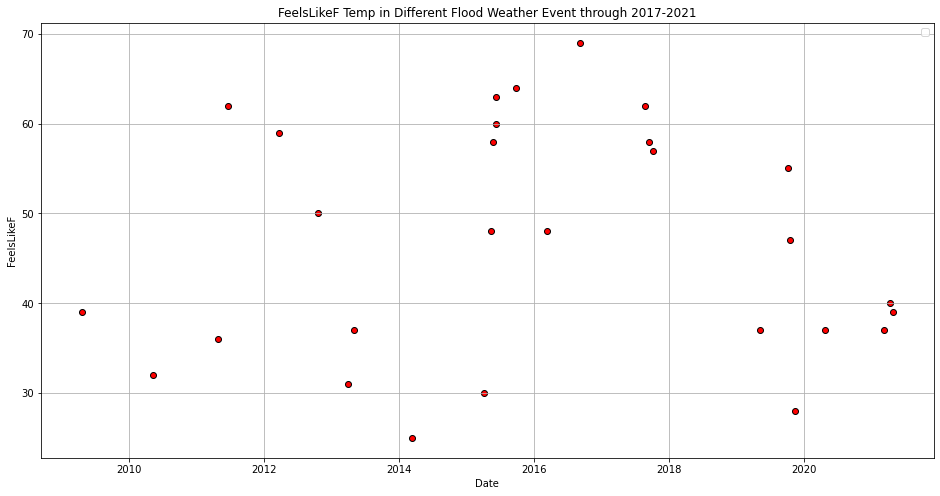

In [18]:
x_values = Flood_df['date']
y_values = Flood_df['FeelsLikeF']
# plt.scatter(x_values, BlizzData, marker="o", facecolors="red", edgecolors="black",
#             s=x_values, alpha=0.75, label='Temperature (F)')

plt.figure(figsize=(16, 8))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.grid()
plt.xlabel('Date')
plt.ylabel('FeelsLikeF')
plt.title('FeelsLikeF Temp in Different Flood Weather Event through 2017-2021')
plt.legend()
plt.savefig('FeelsLikeFFlood Weather Event 2017-2021')
plt.show()

In [19]:
IceStorm_Weather

maxtempF  mintempF  avgtempF  totalprecipIn  \
weatherDesc date                                                      
Heavy snow  2008-11-07        43        35        38           0.22   
            2008-12-09        21        10        16           0.09   
            2008-12-16         7        -5         1           0.07   
            2008-12-19        22        13        17           0.15   
            2008-12-20        22         0        15           0.19   
...                          ...       ...       ...            ...   
            2021-02-04        34         5        21           0.21   
            2021-02-21        30        18        25           0.04   
            2021-02-28        32         6        22           0.27   
            2021-03-01        18        12        15           0.02   
            2021-03-15        35        29        31           0.28   

                        windspeedMiles  humidity  FeelsLikeF  visibilityMiles  
weatherDesc date                                                               
Heavy snow  2008-11-07               4        94          35                2  
            2008-12-09              10        95           3                3  
            2008-12-16               6        95         -12                3  
            2008-12-19               7        97           8                2  
            2008-12-20              11        98           1                2  
...                                ...       ...         ...              ...  
            2021-02-04              14        94           8                2  
            2021-02-21               6        96          19                1  
            2021-02-28              10        88          13                4  
            2021-03-01               6        88           6                5  
            2021-03-15              12        73          22                2  

[111 rows x 8 columns]

No handles with labels found to put in legend.


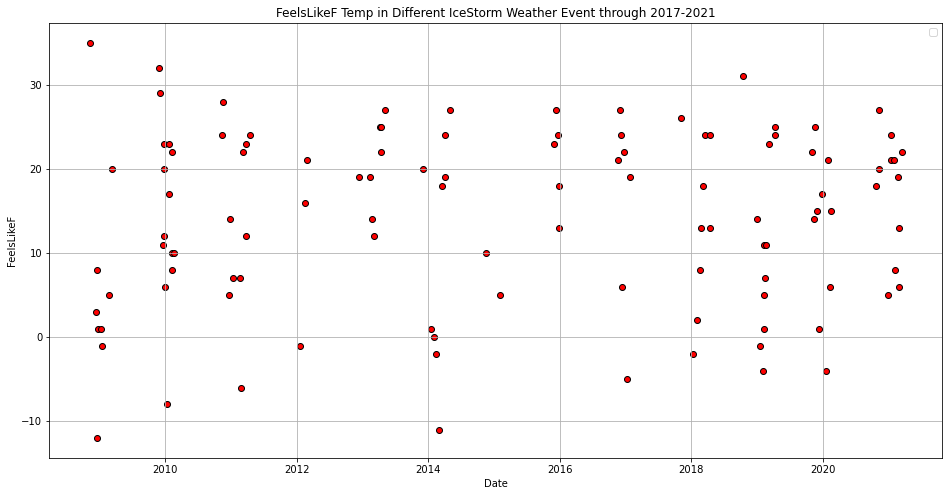

In [20]:
x_values = IceStorm_df['date']
y_values = IceStorm_df['FeelsLikeF']
# plt.scatter(x_values, BlizzData, marker="o", facecolors="red", edgecolors="black",
#             s=x_values, alpha=0.75, label='Temperature (F)')

plt.figure(figsize=(16, 8))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.grid()
plt.xlabel('Date')
plt.ylabel('FeelsLikeF')
plt.title('FeelsLikeF Temp in Different IceStorm Weather Event through 2017-2021')
plt.legend()
plt.savefig('FeelsLikeFIceStorm Weather Event 2017-2021')
plt.show()

In [21]:
#=======================CRIMES PER WEATHER EVENTS===================

In [22]:
# Read in the crime data

Crime_df = pd.read_csv("../Resources/NEIGHBORHOOD_CRIME_STATS.csv")
Crime_df.head()

,neighborhoodCrimeStatisticsID,neighborhood,ucrDescription,number,reportMonth,reportYear
0,1,** NOT ASSIGNED **,Aggravated Assault,2.0,8,2017
1,2,** NOT ASSIGNED **,Arson,0.0,8,2017
2,3,** NOT ASSIGNED **,Auto Theft,3.0,8,2017
3,4,** NOT ASSIGNED **,Burglary,1.0,8,2017
4,5,** NOT ASSIGNED **,Homicide,0.0,8,2017


In [23]:
Crime_df.dtypes

neighborhoodCrimeStatisticsID      int64
neighborhood                      object
ucrDescription                    object
number                           float64
reportMonth                        int64
reportYear                         int64
dtype: object

In [24]:
AllCrime_df= Crime_df.groupby(['ucrDescription', 'reportYear']).sum()
AllCrime_df


neighborhoodCrimeStatisticsID   number  \
ucrDescription     reportYear                                           
Aggravated Assault 2017                               773080    887.0   
                   2018                              8174496   1797.0   
                   2019                             17095584   1963.0   
                   2020                             26016672   2357.0   
                   2021                              7898088    411.0   
Arson              2017                               773520     52.0   
                   2018                              8175552     71.0   
                   2019                             17096640     70.0   
                   2020                             26017728    113.0   
                   2021                              7898352     18.0   
Auto Theft         2017                               773960    982.0   
                   2018                              8176608   2219.0   
                   2019                             17097696   2878.0   
                   2020                             26018784   3930.0   
                   2021                              7898616   1007.0   
Burglary           2017                               774400   1715.0   
                   2018                              8177664   3059.0   
                   2019                             17098752   3329.0   
                   2020                             26019840   3932.0   
                   2021                              7898880    514.0   
Homicide           2017                               774840     16.0   
                   2018                              8178720     30.0   
                   2019                             17099808     43.0   
                   2020                             26020896     74.0   
                   2021                              7899144     16.0   
Larceny            2017                               775280   5558.0   
                   2018                              8179776  11513.0   
                   2019                             17100864  13037.0   
                   2020                             26021952  11697.0   
                   2021                              7899408   2115.0   
Rape               2017                               775720    206.0   
                   2018                              8180832    455.0   
                   2019                             17101920    474.0   
                   2020                             26023008    385.0   
                   2021                              7899672    103.0   
Robbery            2017                               776160    724.0   
                   2018                              8181888   1188.0   
                   2019                             17102976   1305.0   
                   2020                             26024064   1732.0   
                   2021                              7899936    363.0   

                               reportMonth  
ucrDescription     reportYear               
Aggravated Assault 2017               4400  
                   2018               6864  
                   2019               6864  
                   2020               6864  
                   2021                528  
Arson              2017               4400  
                   2018               6864  
                   2019               6864  
                   2020               6864  
                   2021                528  
Auto Theft         2017               4400  
                   2018               6864  
                   2019               6864  
                   2020               6864  
                   2021                528  
Burglary           2017               4400  
                   2018               6864  
                   2019               6864  
                   2020               6864  
                   

In [25]:
Crime_df['ucrDescription'].unique()


array(['Aggravated Assault', 'Arson', 'Auto Theft', 'Burglary',
       'Homicide', 'Larceny', 'Rape', 'Robbery'], dtype=object)

In [26]:
Crime_df['Date'] = pd.to_datetime(Crime_df.reportYear.astype(str) + '/' + Crime_df.reportMonth.astype(str) + '/01')
Crime_df.drop(labels=['reportMonth', 'reportYear'], axis=1, inplace=True)
Crime_df = Crime_df.dropna()
Crime_df = Crime_df[Crime_df['number'] != 0]
Crime_df.to_csv("../Resources/crime_date.csv", encoding="utf-8", index=False)
Crime_df = pd.read_csv('../Resources/crime_date.csv')
Crime_df

,neighborhoodCrimeStatisticsID,neighborhood,ucrDescription,number,Date
0,1,** NOT ASSIGNED **,Aggravated Assault,2.0,2017-08-01
1,3,** NOT ASSIGNED **,Auto Theft,3.0,2017-08-01
2,4,** NOT ASSIGNED **,Burglary,1.0,2017-08-01
3,6,** NOT ASSIGNED **,Larceny,8.0,2017-08-01
4,7,** NOT ASSIGNED **,Rape,2.0,2017-08-01
...,...,...,...,...,...
15342,30968,Windom Park,Robbery,1.0,2021-03-01
15343,30969,Z_** NOT ASSIGNED **,Aggravated Assault,2.0,2021-03-01
15344,30971,Z_** NOT ASSIGNED **,Auto Theft,2.0,2021-03-01
15345,30974,Z_** NOT ASSIGNED **,Larceny,8.0,2021-03-01


In [27]:
# Non-violent crime (Arson,Auto theft,Burglary and Larceny)

In [28]:
Crime_df['Date'] = pd.to_datetime(Crime_df['Date'])
Arson_df = Crime_df[(Crime_df['ucrDescription'] == 'Arson')]
AutoTheft_df = Crime_df[(Crime_df['ucrDescription'] == 'Auto Theft')]
Burglary_df = Crime_df[(Crime_df['ucrDescription'] == 'Burglary')]
Larceny_df = Crime_df[(Crime_df['ucrDescription'] == 'Larceny')]

In [29]:
Arson_month = Arson_df.groupby(pd.Grouper(key="Date", freq="1M")).sum()
AutoTheft_month = AutoTheft_df.groupby(pd.Grouper(key="Date", freq="1M")).sum()
Burglary_month = Arson_df.groupby(pd.Grouper(key="Date", freq="1M")).sum()
Larceny_month = Arson_df.groupby(pd.Grouper(key="Date", freq="1M")).sum()

In [30]:
Arson_month

,neighborhoodCrimeStatisticsID,number
Date,,
2017-08-31,2358,9.0
2017-09-30,11268,18.0
2017-10-31,10892,6.0
2017-11-30,15212,10.0
2017-12-31,22758,9.0
2018-01-31,15616,4.0
2018-02-28,14230,3.0
2018-03-31,37414,9.0
2018-04-30,12020,2.0


In [31]:
AutoTheft_month


,neighborhoodCrimeStatisticsID,number
Date,,
2017-08-31,23043,207.0
2017-09-30,70582,193.0
2017-10-31,118225,176.0
2017-11-30,150935,186.0
2017-12-31,186841,220.0
2018-01-31,287110,278.0
2018-02-28,240020,198.0
2018-03-31,275548,170.0
2018-04-30,311004,134.0


In [32]:
Burglary_month


,neighborhoodCrimeStatisticsID,number
Date,,
2017-08-31,2358,9.0
2017-09-30,11268,18.0
2017-10-31,10892,6.0
2017-11-30,15212,10.0
2017-12-31,22758,9.0
2018-01-31,15616,4.0
2018-02-28,14230,3.0
2018-03-31,37414,9.0
2018-04-30,12020,2.0


In [33]:
Larceny_month


,neighborhoodCrimeStatisticsID,number
Date,,
2017-08-31,2358,9.0
2017-09-30,11268,18.0
2017-10-31,10892,6.0
2017-11-30,15212,10.0
2017-12-31,22758,9.0
2018-01-31,15616,4.0
2018-02-28,14230,3.0
2018-03-31,37414,9.0
2018-04-30,12020,2.0


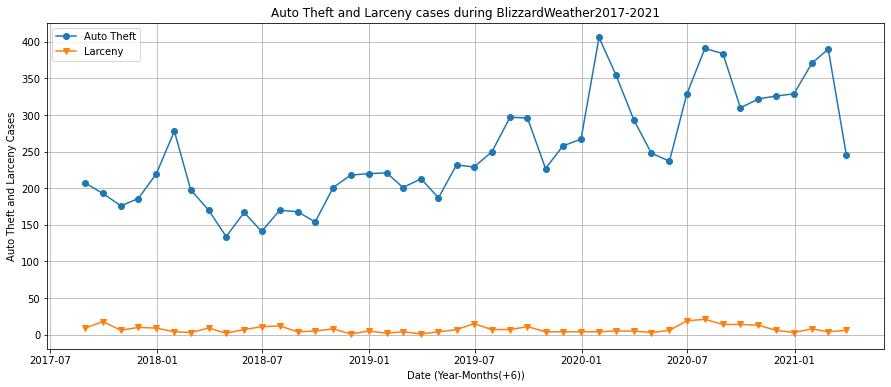

In [34]:
# Auto Theft and Larceny cases during BlizzerWeather2017-2021

x2_values =  AutoTheft_month['number']
x4_values =  Larceny_month['number']
y_values = Blizzard_df['date']
plt.figure(figsize=(15, 6))
plt.plot(x2_values, marker='o', label='Auto Theft')
plt.plot(x4_values, marker='v', label='Larceny')
plt.grid()
plt.xlabel('Date (Year-Months(+6))')
plt.ylabel('Auto Theft and Larceny Cases')
plt.title('Auto Theft and Larceny cases during BlizzardWeather2017-2021')
plt.legend()
plt.savefig('AutoTheftLarcenyBlizzardWeather2017-2021')
plt.show()

In [35]:
# Perform a linear regression on Temperature vs. Assault
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(200,50),fontsize=15,color="red")
plt.xlabel('Assault')
plt.ylabel('Avg Temp (F)')
plt.title('Temperature (F) & Assault(2017-2021)')
#plt.savefig('line_reg for Temperature vs Assault')
print(f"The r-value is: {rvalue**2}")

NameError: name 'stats' is not defined

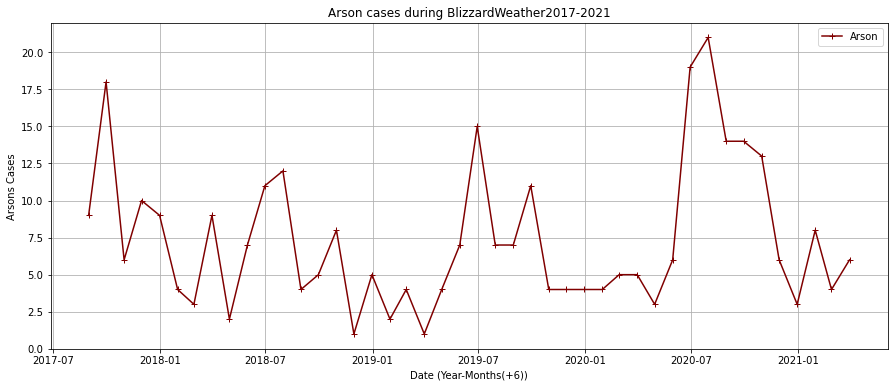

In [43]:
x1_values =  Arson_month['number']

y_values = Blizzard_df['date']
plt.figure(figsize=(15, 6))
plt.plot(x1_values, marker='+', label='Arson', color='maroon')

plt.grid()
plt.xlabel('Date (Year-Months(+6))')
plt.ylabel('Arsons Cases')
plt.title('Arson cases during BlizzardWeather2017-2021')
plt.legend()
plt.savefig('Arson cases during BlizzardWeather2017-2021')
plt.show()

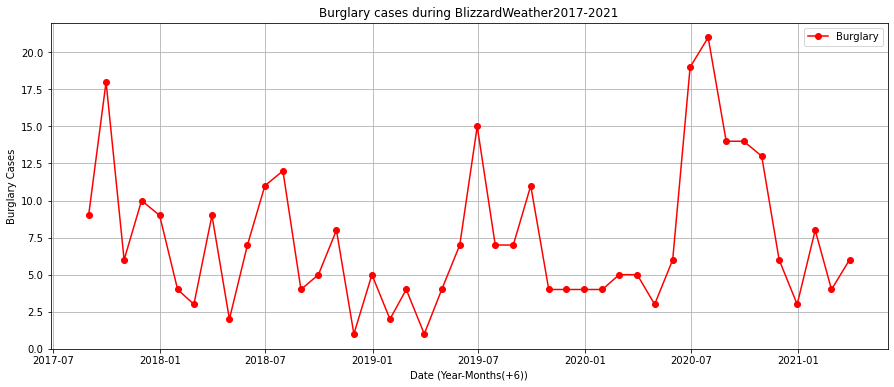

In [36]:

x3_values =  Burglary_month['number']

y_values = Blizzard_df['date']
plt.figure(figsize=(15, 6))

plt.plot(x3_values, marker='o', label='Burglary', color='red')
plt.grid()
plt.xlabel('Date (Year-Months(+6))')
plt.ylabel('Burglary Cases')
plt.title('Burglary cases during BlizzardWeather2017-2021')
plt.legend()
plt.savefig('Burglary cases during BlizzardWeather2017-2021')
plt.show()

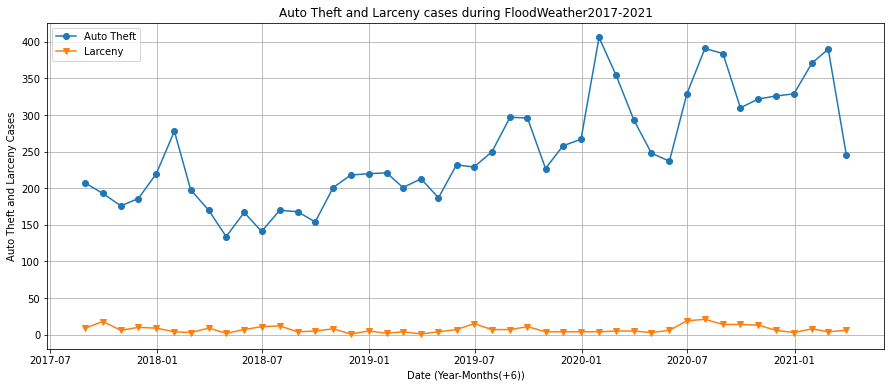

In [37]:
# Auto Theft and Larceny cases during FloodWeather2017-2021

x2_values =  AutoTheft_month['number']
x4_values =  Larceny_month['number']
y_values = Flood_df['date']



plt.figure(figsize=(15, 6))
plt.plot(x2_values, marker='o', label='Auto Theft')
plt.plot(x4_values, marker='v', label='Larceny')

plt.grid()
plt.xlabel('Date (Year-Months(+6))')
plt.ylabel('Auto Theft and Larceny Cases')
plt.title('Auto Theft and Larceny cases during FloodWeather2017-2021')
plt.legend()
plt.savefig('AutoTheftLarcenyFloodWeather2017-2021')
plt.show()

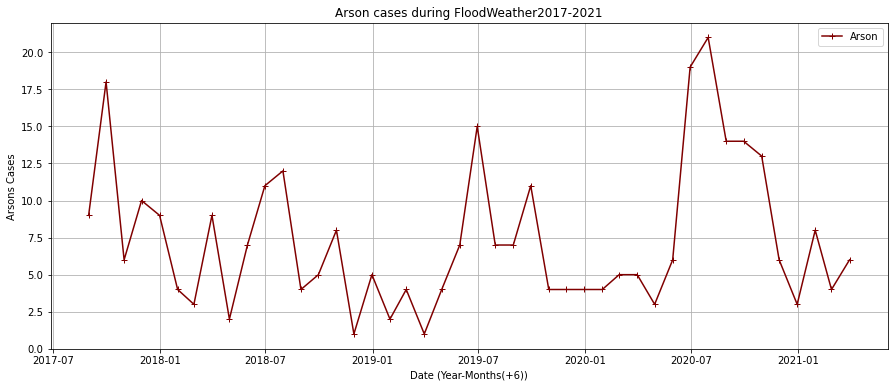

In [38]:
x1_values =  Arson_month['number']

y_values = Flood_df['date']
plt.figure(figsize=(15, 6))
plt.plot(x1_values, marker='+', label='Arson', color='maroon')

plt.grid()
plt.xlabel('Date (Year-Months(+6))')
plt.ylabel('Arsons Cases')
plt.title('Arson cases during FloodWeather2017-2021')
plt.legend()
plt.savefig('Arson cases during FloodWeather2017-2021')
plt.show()

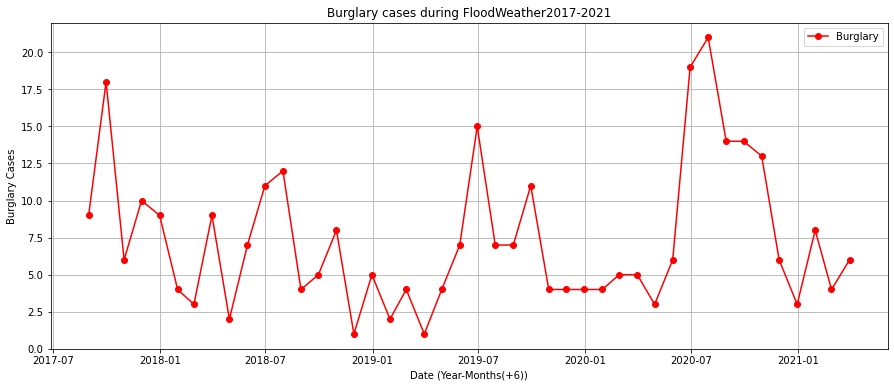

In [39]:
x3_values =  Burglary_month['number']

y_values = Flood_df['date']
plt.figure(figsize=(15, 6))

plt.plot(x3_values, marker='o', label='Burglary', color='red')
plt.grid()
plt.xlabel('Date (Year-Months(+6))')
plt.ylabel('Burglary Cases')
plt.title('Burglary cases during FloodWeather2017-2021')
plt.legend()
plt.savefig('Burglary cases during FloodWeather2017-2021')
plt.show()

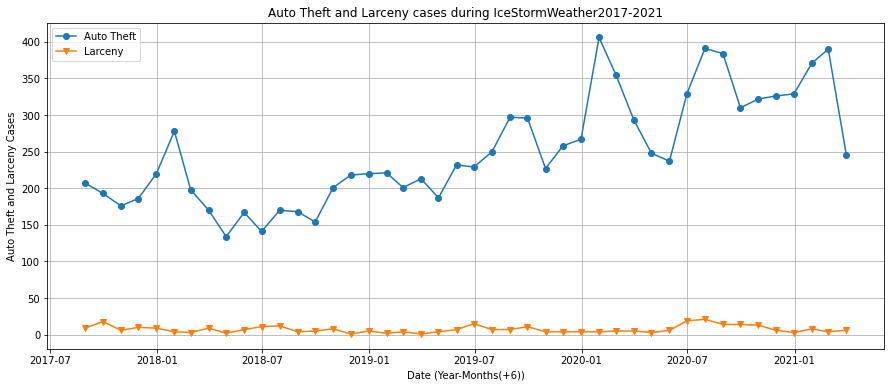

In [40]:
# Auto Theft and Larceny cases during IceStormWeather2017-2021

x2_values =  AutoTheft_month['number']
x4_values =  Larceny_month['number']
y_values = IceStorm_df['date']



plt.figure(figsize=(15, 6))
plt.plot(x2_values, marker='o', label='Auto Theft')
plt.plot(x4_values, marker='v', label='Larceny')

plt.grid()
plt.xlabel('Date (Year-Months(+6))')
plt.ylabel('Auto Theft and Larceny Cases')
plt.title('Auto Theft and Larceny cases during IceStormWeather2017-2021')
plt.legend()
plt.savefig('AutoTheftLarcenyIceStormWeather2017-2021')
plt.show()

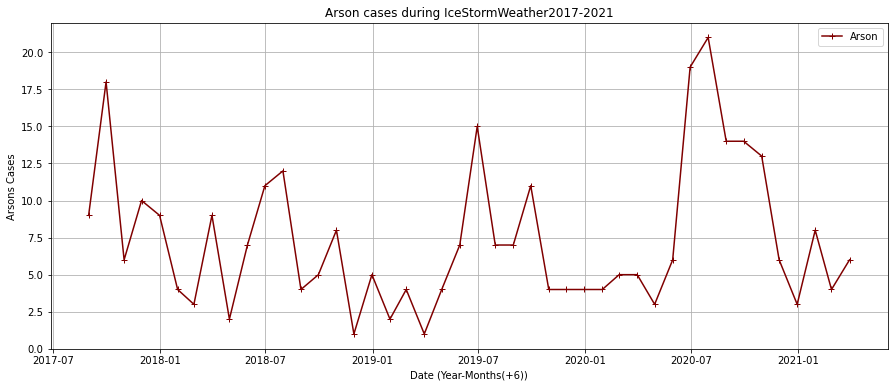

In [41]:
x1_values =  Arson_month['number']

y_values = IceStorm_df['date']
plt.figure(figsize=(15, 6))
plt.plot(x1_values, marker='+', label='Arson', color='maroon')

plt.grid()
plt.xlabel('Date (Year-Months(+6))')
plt.ylabel('Arsons Cases')
plt.title('Arson cases during IceStormWeather2017-2021')
plt.legend()
plt.savefig('Arson cases during IceStormWeather2017-2021')
plt.show()

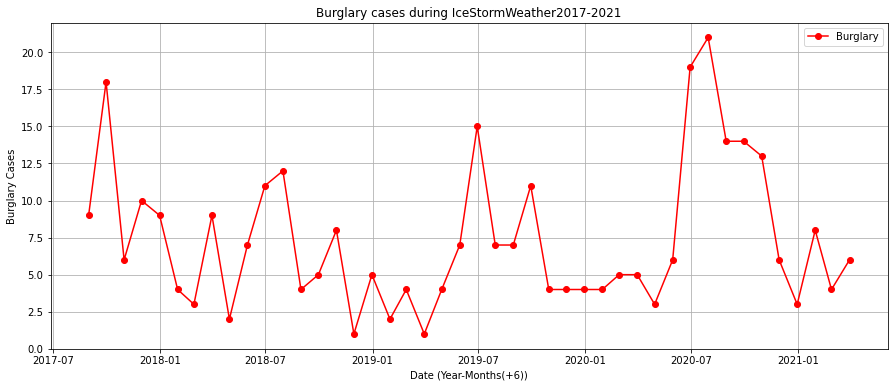

In [42]:
x3_values =  Burglary_month['number']

y_values = IceStorm_df['date']
plt.figure(figsize=(15, 6))

plt.plot(x3_values, marker='o', label='Burglary', color='red')
plt.grid()
plt.xlabel('Date (Year-Months(+6))')
plt.ylabel('Burglary Cases')
plt.title('Burglary cases during IceStormWeather2017-2021')
plt.legend()
plt.savefig('Burglary cases during IceStormWeather2017-2021')
plt.show()